In [3]:
#import dependencies
import keras
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D, LSTM
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#set hyperparameters
output_dir = 'model_output/rnn_LSTM'

#training
epochs = 4
batch_size = 128

#vector-space embedding
n_dim = 64
n_unique_words = 10000
max_review_length = 100 #lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2

#lstm layer architecture
n_lstm = 256
drop_lstm = 0.2

In [3]:
#model architecture
model = Sequential()

#vector-space embedding:
model.add(Embedding(n_unique_words, n_dim,
                    input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))

#rnn LSTM layer:
model.add(LSTM(n_lstm, dropout=drop_lstm))

#output layer
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 64)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


In [9]:
#data preprocessing
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)
#standardizing input length by padding and truncating
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
#Create an object and directory for checkpoint model parameters after each epoch
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/RNNweights.{epoch:02d}.hdf5")

if not os.path.exists((output_dir)):
    os.makedirs(output_dir)

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_valid, y_valid),
          callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 138s 698ms/step - loss: 0.4557 - accuracy: 0.7704 - val_loss: 0.3700 - val_accuracy: 0.8444
Epoch 2/4
196/196 [==============================] - 140s 717ms/step - loss: 0.2833 - accuracy: 0.8870 - val_loss: 0.3468 - val_accuracy: 0.8493
Epoch 3/4
196/196 [==============================] - 137s 700ms/step - loss: 0.2359 - accuracy: 0.9068 - val_loss: 0.3677 - val_accuracy: 0.8454
Epoch 4/4
196/196 [==============================] - 138s 704ms/step - loss: 0.1887 - accuracy: 0.9278 - val_loss: 0.3820 - val_accuracy: 0.8395


In [11]:
model.load_weights(output_dir+"/RNNweights.02.hdf5")

In [12]:
y_hat = model.predict_on_batch(x_valid)

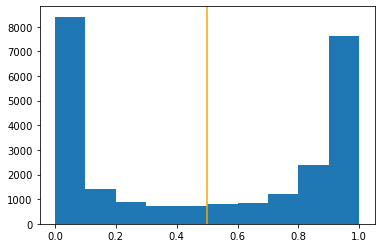

In [13]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [14]:
pct_auc = roc_auc_score(y_valid, y_hat) * 100
"{:0.2f}".format(pct_auc)

'93.04'

In [1]:
from keras.layers import Bidirectional

In [5]:
#model architecture
bi_model = Sequential()

#vector-space embedding:
bi_model.add(Embedding(n_unique_words, n_dim,
                       input_length=max_review_length))
bi_model.add(SpatialDropout1D(drop_embed))

#rnn LSTM layer:
bi_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))

#output layer
bi_model.add(Dense(1, activation='sigmoid'))

In [6]:
bi_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:

output_dir = 'model_output/rnn_Bi-LSTM'

#Create an object and directory for checkpoint model parameters after each epoch
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/RNN-bi-LSTM-weights.{epoch:02d}.hdf5")

if not os.path.exists((output_dir)):
    os.makedirs(output_dir)

In [10]:
bi_model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_valid, y_valid),
          callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 258s 1s/step - loss: 0.4969 - accuracy: 0.7459 - val_loss: 0.4350 - val_accuracy: 0.8267
Epoch 2/4
196/196 [==============================] - 234s 1s/step - loss: 0.2910 - accuracy: 0.8818 - val_loss: 0.3500 - val_accuracy: 0.8454
Epoch 3/4
196/196 [==============================] - 243s 1s/step - loss: 0.2397 - accuracy: 0.9061 - val_loss: 0.3794 - val_accuracy: 0.8469
Epoch 4/4
196/196 [==============================] - 257s 1s/step - loss: 0.2002 - accuracy: 0.9241 - val_loss: 0.3900 - val_accuracy: 0.8445


In [ ]:
#stacked bidirectional LSTM RNN
st_bi_model = Sequential()
st_bi_model.add(Embedding(n_unique_words, n_dim, 
                          input_length=max_review_length))
st_bi_model.add(SpatialDropout1D(drop_embed))
st_bi_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm,
                                   return_sequences=True)))
st_bi_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
st_bi_model.add(Dense(1, activation='sigmoid'))